In [10]:
# from training.utils import generate_metadata
# base_dir = "c:/Users/amine/Downloads/reduced_technical_test/dataset_word_color/"
# output_path = "c:/Users/amine/Downloads/publicis/training/artifacts/"
# df = generate_metadata(base_dir, output_path)

In [11]:
import pandas as pd
df = pd.read_csv("c:/Users/amine/Downloads/publicis/training/artifacts/metadata/font_dataset.csv")

<Axes: xlabel='class'>

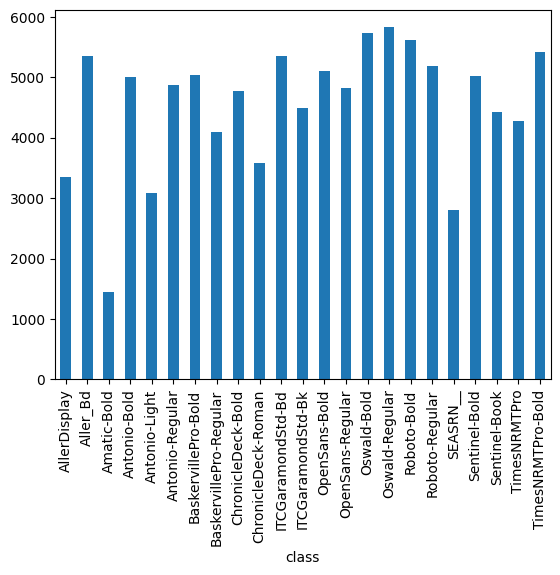

In [12]:
df.groupby("class").id.count().plot(kind="bar")

In [13]:
from training.config import DataConfig
from training.data_pipelines import ImageDataModule

data_config = DataConfig(batch_size=128,subset_fraction= 0.1)
data_preprocesor = ImageDataModule(data_config)
train_loader, val_loader = data_preprocesor.setup_training()
data_config.num_classes = data_preprocesor.num_classes
data_preprocesor.summary

Train: 9938, Validation: 524


In [14]:
from training.config import ModelConfig
from training.models import models_dict

model_name = "smallresnet"
model = models_dict[model_name](ModelConfig(name = model_name, num_classes=data_config.num_classes))


In [15]:
from training.config import TrainingConfig
from training.trainer import Trainer

trainer = Trainer(model, TrainingConfig(batch_size=data_config.batch_size, num_epochs = 2), classes_dict = data_preprocesor.classes_dict)

In [ ]:
trainer.fit(train_loader, val_loader)


Epoch [1/2]


Validation: 100%|██████████| 5/5 [00:04<00:00,  1.06it/s, val_acc=5.15, val_loss=3.14]


Epoch 1: Train Loss=3.1748, Train Acc=4.86%, Val Loss=3.1376, Val Acc=5.15%
Checkpoint saved: c:/Users/amine/Downloads/PUBLICIS/training/artifacts/checkpoints\smallresnet\best.pt

Epoch [2/2]


Training:  55%|█████▌    | 43/78 [02:28<01:48,  3.09s/it, acc=6.41, loss=3.12]

In [ ]:
from training.config import TestConfig
from training.inference import TestRunner
model_name = "mobilenet"
checkpoint_path = "c:/Users/amine/Downloads/PUBLICIS//mobilenet_v3_small.pth"
runner = TestRunner(TestConfig(model_name=model_name, checkpoint_path=checkpoint_path))

In [ ]:
from training.config import EvalConfig
from training.evaluation import Evaluator

predicitions_csv_path = "c:/Users/amine/Downloads/PUBLICIS/training/artifacts/predictions/smallresnet/best_predictions.csv"

evaluator = Evaluator(EvalConfig(predictions_csv_path=predicitions_csv_path))



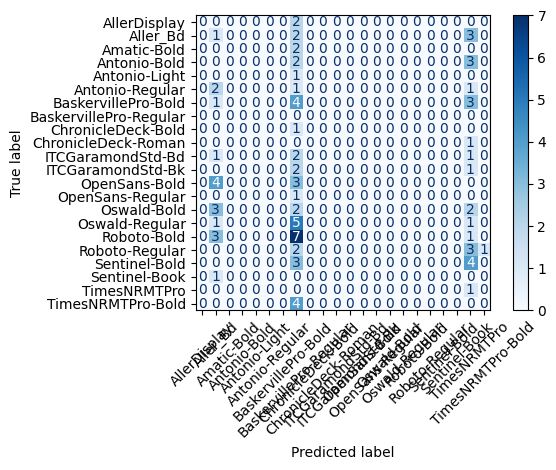

Saving report to c:/Users/amine/Downloads/PUBLICIS/training/artifacts/evaluation_reports\smallresnet


In [ ]:
out = evaluator.evaluate()

In [ ]:
from training.utils import export_to_onnx
model_name = "smallresnet"
checkpoint_path = "c:/Users/amine/Downloads/PUBLICIS/training/artifacts/checkpoints/smallresnet/best.pt"
export_path = "c:/Users/amine/Downloads/PUBLICIS/serving/model/"
export_to_onnx(model_name= model_name, checkpoint_path= checkpoint_path, export_path = export_path)

Model exported to c:\Users\amine\Downloads\PUBLICIS\serving\model\smallresnet/smallresnet.onnx
